### Artigo original
https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/

In [1]:
import time

import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
CONFIDENCE = 0.2  # Confiança mínima para aceitar uma detecção como verdadeira

#  Labels do dataset VOC // 20 classes ~20k de imagens
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat","bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
            "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))  # cores aleatórias pra cada classe

CONFIG_FILE = "data/MobileNetSSD_deploy.prototxt"
WEIGHTS_FILE = "data/MobileNetSSD_deploy.caffemodel"
net = cv2.dnn.readNetFromCaffe(CONFIG_FILE, WEIGHTS_FILE)

#### Carregar e preparar imagem
* Canal de cores: BGR
* Tamanho de imagem de entrada: 300x300
* Preprocessamento: Subtrair 127.5 de todos os pixels e após isso dividir por 127.5 (Assim os valores irão variar de -1 a 1)

In [4]:
image = cv2.imread("test.jpg")
h, w = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1 / 127.5, (300, 300), 127.5)

AttributeError: 'NoneType' object has no attribute 'shape'

#### Predição

In [ ]:
start_time = time.time()
net.setInput(blob)
detections = net.forward()[0, 0]
print(f"[INFO] tempo de predição: {time.time()-start_time:0.4f} s")

[INFO] tempo de predição: 0.0300s


Esse modelo em especial já possui uma camada interna que aplica o NMS e faz o processo inverso do one hot encoder.
Contudo precisamos verificar detecção a detecção para selecionar as detecções maiores que nosso limiar (CONFIDENCE) e ajustar as coordenadas, já que elas são retornadas em porcentagens e devemos ajustar para valores em pixels

as dimensões de "detection" é : [detecções, informações], onde detecções pode possuir N valores e infomações é um vetor de tamanho 7, em que cada indice significa: [0, classe, confiança, xmin_%, ymin_%, xmax_%, ymax_%]

In [ ]:
for i in range(detections.shape[0]):
    confidence = detections[i, 2]
    if confidence > CONFIDENCE:
        # ajuste
        idx = int(detections[i, 1])
        box = detections[i, 3:7] * np.array([w, h, w, h])  # Porcentagem para pixel
        xmin, ymin, xmax, ymax = box.astype("int")

        # prints
        label = f"{CLASSES[idx]}: {confidence:.2%}"
        print(f"[INFO] {label}")
        
        # visualização
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), COLORS[idx], 2)
        y = ymin - 15 if ymin - 15 > 15 else ymin + 15
        cv2.putText(image, label, (xmin, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)

[INFO] bicycle: 98.30%
[INFO] car: 92.84%
[INFO] cat: 75.10%


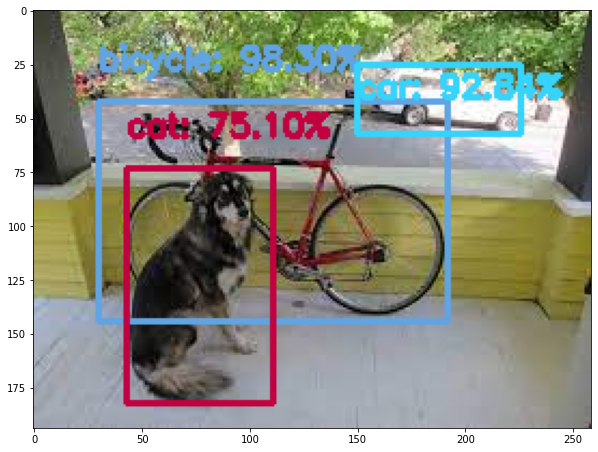

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()